In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"seojeong1105","key":"a63ce81a6f6cd29b58fd09ee933a7273"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d ishantjuyal/emotions-in-text

  0% 0.00/781k [00:00<?, ?B/s]
100% 781k/781k [00:00<00:00, 96.9MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("emotions-in-text.zip", "r")
zip_ref.extractall("files")
zip_ref.close()
import pandas as pd
df=pd.read_csv("/content/files/Emotion_final.csv")

In [ ]:
from sklearn.utils import shuffle

df = shuffle(df)
df.reset_index(inplace=True, drop=True)
df = df[:4000]

In [ ]:
import re
import string
import nltk
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def cleaning_text(text):
    text = text.lower()
    text = re.sub('r<.*?>', ' ', text)
    text = re.sub(r'#\w+', ' ', text)
    text = re.sub(r'@\w+', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    text = re.sub(r'http\S+', " ", text)

    text = text.split()
    stop_words = stopwords.words("english")
    text = " ".join([word for word in text if not word in stop_words])

    for punctuation in string.punctuation:
        text = text.replace(punctuation, "")

    return text

df['Text'] = df['Text'].apply(lambda x: cleaning_text(x))

In [ ]:
category = pd.get_dummies(df.Emotion)
df_new = pd.concat([df, category], axis=1)
df_new = df_new.drop(columns='Emotion')
df_new

,Text,anger,fear,happy,love,sadness,surprise
0,feel completely helpless anything help affecte...,0,1,0,0,0,0
1,days makes feel little uncertain future pressu...,0,1,0,0,0,0
2,feel little bit sorry ahem face hard times,0,0,0,0,1,0
3,start feel like im getting death beloved cat t...,0,0,0,1,0,0
4,said words devotee feel relieved hear title de...,0,0,1,0,0,0
...,...,...,...,...,...,...,...
3995,im feeling much festive tree,0,0,1,0,0,0
3996,feel gonna months days ever since broke,0,0,0,0,1,0
3997,left gym sunday morning feeling invigorated,0,0,1,0,0,0
3998,feel like semester good,0,0,1,0,0,0


In [ ]:
text = df_new['Text'].values
label = df_new[['anger', 'fear', 'happy', 'love', 'sadness', 'surprise']].values

In [ ]:
from sklearn.model_selection import train_test_split
text_train, text_test, label_train, label_test = train_test_split(text, label, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=2000, oov_token='x')
tokenizer.fit_on_texts(text_train)
tokenizer.fit_on_texts(text_test)

sekuens_train = tokenizer.texts_to_sequences(text_train)
sekuens_test = tokenizer.texts_to_sequences(text_test)

padded_train = pad_sequences(sekuens_train, maxlen=35)
padded_test = pad_sequences(sekuens_test, maxlen=35)

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=2000, output_dim=16),
    tf.keras.layers.LSTM(64, dropout=0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          32000     
                                                                 
 lstm (LSTM)                 (None, 64)                20736     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
Total params: 69,702
Trainable params: 69,702
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(padded_train, label_train, epochs=10, batch_size=3, validation_data=(padded_test, label_test))

Epoch 1/10
1067/1067 [==============================] - 16s 15ms/step - loss: 1.4396 - accuracy: 0.3753 - val_loss: 1.3638 - val_accuracy: 0.4062
Epoch 2/10
1067/1067 [==============================] - 16s 15ms/step - loss: 0.9465 - accuracy: 0.6319 - val_loss: 1.0496 - val_accuracy: 0.6388
Epoch 3/10
1067/1067 [==============================] - 17s 15ms/step - loss: 0.6595 - accuracy: 0.7603 - val_loss: 0.9947 - val_accuracy: 0.6800
Epoch 4/10
1067/1067 [==============================] - 17s 16ms/step - loss: 0.4993 - accuracy: 0.8288 - val_loss: 0.8582 - val_accuracy: 0.7287
Epoch 5/10
1067/1067 [==============================] - 16s 15ms/step - loss: 0.3985 - accuracy: 0.8584 - val_loss: 0.7865 - val_accuracy: 0.7550
Epoch 6/10
1067/1067 [==============================] - 16s 15ms/step - loss: 0.3247 - accuracy: 0.8881 - val_loss: 0.8162 - val_accuracy: 0.7800
Epoch 7/10
1067/1067 [==============================] - 17s 16ms/step - loss: 0.2861 - accuracy: 0.9006 - val_loss: 0.7653 -

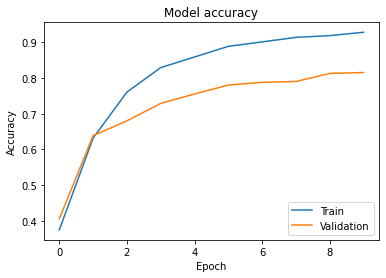

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

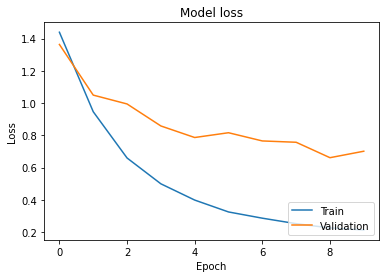

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# K-Fold cross validation

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import numpy as np

acc_per_fold = []
loss_per_fold = []

# Merge inputs and targets
inputs = np.concatenate((padded_train, padded_test), axis=0)
targets = np.concatenate((label_train, label_test), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):
  model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=2000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
  ])
  # Compile the model
  model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history2 = model2.fit(inputs[train], targets[train], batch_size=3, epochs=10)

  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model2.metrics_names[0]} of {scores[0]}; {model2.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1])
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
1067/1067 [==============================] - 18s 15ms/step - loss: 1.5503 - accuracy: 0.3331
Epoch 2/10
1067/1067 [==============================] - 16s 15ms/step - loss: 1.0077 - accuracy: 0.6116
Epoch 3/10
1067/1067 [==============================] - 16s 15ms/step - loss: 0.5826 - accuracy: 0.7972
Epoch 4/10
1067/1067 [==============================] - 16s 15ms/step - loss: 0.3746 - accuracy: 0.8719
Epoch 5/10
1067/1067 [==============================] - 16s 15ms/step - loss: 0.2625 - accuracy: 0.9078
Epoch 6/10
1067/1067 [==============================] - 16s 15ms/step - loss: 0.1846 - accuracy: 0.9406
Epoch 7/10
1067/1067 [==============================] - 16s 15ms/step - loss: 0.1478 - accuracy: 0.9472
Epoch 8/10
1067/1067 [==============================] - 16s 15ms/step - loss: 0.1331 - accuracy: 0.9578
Epoch 9/10
1067/1067 [==============================] - 16s 15ms/step -

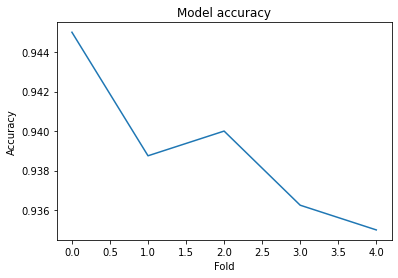

In [ ]:
import matplotlib.pyplot as plt
plt.plot(acc_per_fold)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.show()

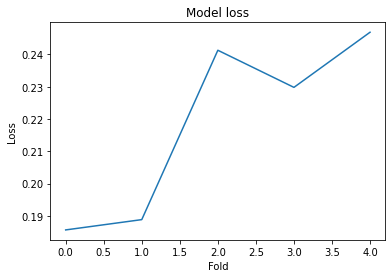

In [ ]:
plt.plot(loss_per_fold)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Fold')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

# predict probabilities for test set
yhat_probs = model2.predict(padded_test, verbose=0)
# predict crisp classes for test set
yhat_classes=np.argmax(yhat_probs,axis=-1)

yhat_probs = yhat_probs[:, 0]
yhat_test = np.argmax(label_test, axis = 1)

accuracy = accuracy_score(yhat_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(yhat_test, yhat_classes, average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(yhat_test, yhat_classes, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(yhat_test, yhat_classes, average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.932500
Precision: 0.936484
Recall: 0.932500
F1 score: 0.933703


<BarContainer object of 4 artists>

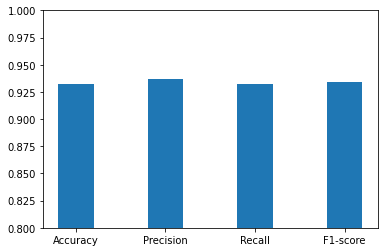

In [ ]:
x = ["Accuracy", "Precision", "Recall", "F1-score"]
y = [accuracy, precision, recall, f1]

plt.ylim([0.8, 1])
plt.bar(x,y, width = 0.4)
